In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np
import math
from matplotlib import style
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#See Styles
#print(plt.style.available)
        


In [2]:
class monte_carlo:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        
    def get_asset(self, symbol):
        #Dates
        start = self.start 
        end = self.end 
        
        prices = web.get_data_yahoo(symbol,start, end)['Close']
        returns = prices.pct_change()
        
        self.returns = returns
        self.prices = prices
        
        
    def monte_carlo_sim(self, num_simulations, predicted_days):
        returns = self.returns
        prices = self.prices
        
        last_price = prices[-1]
        
        simulation_df = pd.DataFrame()

        #Create Each Simulation as a Column in df
        for x in range(num_simulations):
            count = 0
            daily_vol = returns.std()
            
            price_series = []
            
            #Append Start Value
            price = last_price * (1 + np.random.normal(0, daily_vol))
            price_series.append(price)
            
            #Series for Preditcted Days
            for i in range(predicted_days):
                if count == 251:
                    break
                price = price_series[count] * (1 + np.random.normal(0, daily_vol))
                price_series.append(price)
                count += 1
        
            simulation_df[x] = price_series
            self.simulation_df = simulation_df
            self.predicted_days = predicted_days
            
    def brownian_motion(self, num_simulations, predicted_days):
        returns = self.returns
        prices = self.prices

        last_price = prices[-1]

        #Note we are assuming drift here
        simulation_df = pd.DataFrame()
        
        #Create Each Simulation as a Column in df
        for x in range(num_simulations):
            
            #Inputs
            count = 0
            avg_daily_ret = returns.mean()
            variance = returns.var()
            
            daily_vol = returns.std()
            daily_drift = avg_daily_ret - (variance/2)
            drift = daily_drift - 0.5 * daily_vol ** 2
            
            #Append Start Value    
            prices = []
            
            shock = drift + daily_vol * np.random.normal()
            last_price * math.exp(shock)
            prices.append(last_price)
            
            for i in range(predicted_days):
                if count == 251:
                    break
                shock = drift + daily_vol * np.random.normal()
                price = prices[count] * math.exp(shock)
                prices.append(price)
                
        
                count += 1
            simulation_df[x] = prices
            self.simulation_df = simulation_df
            self.predicted_days = predicted_days
            
    def line_graph(self):
        prices = self.prices
        predicted_days = self.predicted_days
        simulation_df = self.simulation_df
        
        last_price = prices[-1]
        fig = plt.figure()
        style.use('bmh')
        
        title = "Monte Carlo Simulation: " + str(predicted_days) + " Days"
        plt.plot(simulation_df)
        fig.suptitle(title,fontsize=18, fontweight='bold')
        plt.xlabel('Day')
        plt.ylabel('Price ($USD)')
        plt.grid(True,color='grey')
        plt.axhline(y=last_price, color='r', linestyle='-')
        plt.show()
   
    
    def key_stats(self,days):
        simulation_df = self.simulation_df
 
        i=0
        print ('#----------------------Descriptive Stats-------------------#')
        while i < days:
            price_array = simulation_df.iloc[i, :]
            print (price_array.mean())
            i=i+1
       

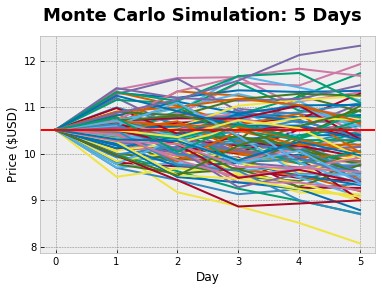

#----------------------Descriptive Stats-------------------#
10.510000228881836
10.465809393119798
10.364138408177356
10.312053243404348
10.248779905149647
Actual prices
Date
2019-02-11    10.61
2019-02-12    10.83
2019-02-13    11.00
2019-02-14    11.23
2019-02-15    11.26
Name: Close, dtype: float64
Accuracy of Model =
0.9413301744671209


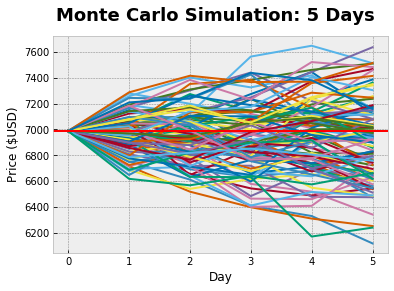

#----------------------Descriptive Stats-------------------#
6988.2001953125
6963.0643380873125
6946.126549268043
6923.586294286102
6948.855048255896
Actual prices
Date
2019-02-04    6988.200195
2019-02-05    7093.600098
2019-02-06    7183.399902
2019-02-07    7302.549805
2019-02-08    7134.250000
Name: Close, dtype: float64
Accuracy of Model =
0.9731357905614573


In [6]:
if __name__== "__main__":

    start = datetime.datetime(2019, 1, 1)
    end = datetime.datetime(2019, 2,10)
    
    sim = monte_carlo(start, end)

    sim.get_asset('TTM')

    sim.brownian_motion(100, 5)
    days=5
    sim.line_graph()
    sim.key_stats(days)
    
    
    start1 = datetime.datetime(2019, 2,11)
    end1 = datetime.datetime(2019, 2,15)
    
    real=monte_carlo(start1, end1)
    real.get_asset('TTM')

    real_price=real.prices
    print ('Actual prices')
    print (real.prices)
    
    simulation_df = sim.simulation_df
 
    i=0
    total_acc=0
    while i < days:
            price_array = simulation_df.iloc[i, :]
            pred_price=price_array.mean()
            diff=abs(real_price[i]-pred_price)
            acc=1-diff/price_array.mean()
            total_acc+=acc
            i=i+1
    
    total_acc/=days
    print('Accuracy of Model =')
    print(total_acc)
    
    start = datetime.datetime(2019, 1, 1)
    end = datetime.datetime(2019, 2,3)
    
    sim = monte_carlo(start, end)

    sim.get_asset('MARUTI.NS')

    sim.brownian_motion(100, 5)
    days=5
    sim.line_graph()
    sim.key_stats(days)
    
    
    start1 = datetime.datetime(2019, 2,4)
    end1 = datetime.datetime(2019, 2,8)
    
    real=monte_carlo(start1, end1)
    real.get_asset('MARUTI.NS')

    real_price=real.prices
    print ('Actual prices')
    print (real.prices)
    
    simulation_df = sim.simulation_df
 
    i=0
    total_acc=0
    while i < days:
            price_array = simulation_df.iloc[i, :]
            pred_price=price_array.mean()
            diff=abs(real_price[i]-pred_price)
            acc=1-diff/price_array.mean()
            total_acc+=acc
            i=i+1
    
    total_acc/=days
    print('Accuracy of Model =')
    print(total_acc)
    
    
  #  sim.VaR()